<a href="https://colab.research.google.com/github/Amisha1019/assignment/blob/main/neuro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#A
a = [0,0,1,1,0,0,
     0,1,0,0,1,0,
     1,1,1,1,1,1,
     1,0,0,0,0,1,
     1,0,0,0,0,1]

#B
b = [0,1,1,1,1,0,
     0,1,0,0,1,0,
     0,1,1,1,1,0,
     0,1,0,0,1,0,
     0,1,1,1,1,0]

#C
c = [0,1,1,1,1,0,
     0,1,0,0,0,0,
     0,1,0,0,0,0,
     0,1,0,0,0,0,
     0,1,1,1,1,0]

In [3]:
y = [[1,0,0],
     [0,1,0],
     [0,0,1]]

In [4]:
import numpy as np
import matplotlib.pyplot as plt

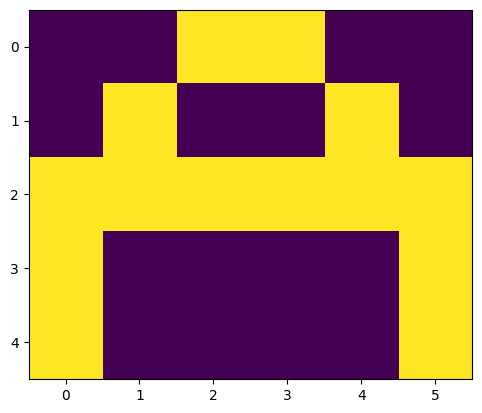

In [5]:
plt.imshow(np.array(a).reshape(5,6))
plt.show()

In [6]:
x = [np.array(a).reshape(1,30),np.array(b).reshape(1,30), np.array(c).reshape(1,30)]

y = np.array(y)

print(x, y )

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [7]:
#input (1,30)
#hidden(1,5)
#output(3,3)

In [8]:
def sigmoid(x):
  return(1/(1+np.exp(-x)))

In [10]:
def f_forward(x, w1, w2):
  z1 = x.dot(w1)
  a1 = sigmoid(z1)

  z2 = a1.dot(w2)
  a2 = sigmoid(z2)
  return(a2)


In [11]:
def generate_wt(x,y):
  l = []
  for i in range(x*y):
      l.append(np.random.randn())
  return(np.array(l).reshape(x,y))

In [12]:
def loss(out, Y):
  s = (np.square(out-Y))
  s = np.sum(s)/len(y)
  return(s)

In [13]:
#back propogation
def back_prop(x,y,w1, w2, alpha):

  #hidden
  z1 = x.dot(w1)
  a1 = sigmoid(z1)

  #output
  z2 = a1.dot(w2)
  a2 = sigmoid(z2)

  d2= (a2-y)
  d1 = np.multiply((w2.dot((d2.transpose())))).transpose(),(np.multiply(a1, 1-a1))

  #gradient
  w1_adj = x.transpose().dot(d1)
  w_2_adj = a1.transpose().dot(d2)

  #update
  w1 = w1 - alpha*w1_adj
  w2 = w2 - alpha*w_2_adj

  return(w1,w2)


In [20]:
def train(x,y,w1,w2,alpha=0.01, epoch = 10):
  acc= []
  loss= []
  for i in range(len(x)):
    out = f_forward(x[i,w1,w2])
    l.append((loss(out,Y[i])))
    w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
  print("Epochs:", j+1, "acc:", (1-(sum(l)/len(x)))*100)
  acc.append((1-(sum(l)/len(x)))*100)
  loss.append(sum(l)/len(x))
  return(acc,loss,w1,w2)


In [28]:
def predict(x,w1,w2):
  out = f_forward(x,w1,w2)
  maxm=0
  k=0
  for i in range(len(out[0])):
    if(maxm<out[0][i]):
      maxm = out[0][i]
      k = i
  if (k == 0):
    print("image is of letter a")
  elif(k == 1):
    print("image is of letter b")
  else:
    print("image is of letter c")
  plt.imshow(x.reshape(5,6))
  plt.show()

In [29]:
w1 = generate_wt(30,5)
w2 = generate_wt(5,3)
print(w1, w2)

[[ 0.36275199 -0.41583711  0.49051725  0.27696326 -1.09206094]
 [ 0.82314617  1.16389314  0.01531552  0.88315185 -0.68347475]
 [ 1.79398026  0.88016941  0.51984616 -1.17823087  0.69699127]
 [ 0.75743966 -0.45943243 -0.94726717 -0.51348537  0.87239845]
 [-1.37327135 -0.070517   -0.0829232  -1.01267659 -0.83422317]
 [-0.58636284 -0.27101963  0.88678573 -0.98099193 -1.97011853]
 [-1.27250376  0.36282925 -0.26216872  0.2400297  -1.18931006]
 [-0.20087897 -0.64926558  1.0550515  -0.65634409 -1.52967545]
 [-0.04124576 -0.91372009 -1.08627439  0.42756007  0.86216134]
 [-0.48747029 -1.11149509 -0.47427153  1.96084463  0.02958014]
 [-0.27821401 -0.78100441 -0.8990357  -0.42141995  0.25415446]
 [ 0.5079757   2.56907886 -0.13557906  0.73027374 -1.03438581]
 [ 0.49084934 -0.71807093  0.21443858  0.77352169 -0.25683664]
 [-0.31501979 -0.7537008   0.7315965   0.86795053 -0.62115264]
 [-0.44139303 -0.69025868  2.46250776 -0.46933648  0.81936764]
 [-0.8142541  -0.10117489 -0.32614355  0.31113981  0.95